In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1. Import các thư viện cần thiết**

In [2]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

**2. Đọc file dữ liệu GAS và chia dataset theo tỉ lệ 6:3:1**

In [4]:
# Đọc file dữ liệu
df = pd.read_csv('/content/drive/MyDrive/PTTK/BIDV.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')  # Use the correct format
df.set_index('Date', inplace=True)
df = df.dropna() # Drop missing values



In [5]:
# Split the data into training, testing
train_size73 = int(0.7 * len(df))
test_size73 = int(0.3 * len(df))

train_data73 = df[:train_size73]
test_data73 = df[train_size73:train_size73+test_size73]
# Split the data into training, testing
train_size82 = int(0.8 * len(df))
test_size82 = int(0.2 * len(df))

train_data82 = df[:train_size82]
test_data82 = df[train_size82:train_size82+test_size82]
# Split the data into training, testing
train_size91 = int(0.9 * len(df))
test_size91 = int(0.1 * len(df))

train_data91 = df[:train_size91]
test_data91 = df[train_size91:train_size91+test_size91]

**Xem** **lại** **dataset**

In [6]:
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2016-01-05,14155.0,14225.0,14366.0,14085.0,1.39M,0.0
2016-01-06,14225.0,14085.0,14296.0,14085.0,1.13M,0.0
2016-01-07,13592.0,14155.0,14225.0,13380.0,3.25M,0.0
2016-01-08,13240.0,13592.0,13592.0,12887.0,1.53M,0.0
2016-01-11,13380.0,13380.0,13592.0,13310.0,1.14M,0.0
...,...,...,...,...,...,...
2023-12-21,41800.0,40900.0,41900.0,40900.0,1.14M,0.0
2023-12-22,42450.0,41800.0,42450.0,41400.0,1.19M,0.0
2023-12-25,43200.0,42500.0,43300.0,42000.0,1.17M,0.0


**3. Dùng model ARIMA để train data**

In [7]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.4 MB/s eta 0:00:00


In [8]:
# Quá trình Training
x_train73 = np.array(train_data73.index).reshape(-1, 1)
y_train73 = np.array(train_data73['Price'])
# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model73 = auto_arima(y_train73, trace=True, error_action='ignore', suppress_warnings=True, seasonal = False)
# Fit the model
model73.fit(y_train73)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=21861.400, Time=1.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21855.936, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21857.911, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21857.916, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21854.699, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21859.939, Time=0.31 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.821 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [9]:
# Quá trình Training
x_train82 = np.array(train_data82.index).reshape(-1, 1)
y_train82 = np.array(train_data82['Price'])
# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model82 = auto_arima(y_train82, trace=True, error_action='ignore', suppress_warnings=True, seasonal = False)
# Fit the model
model82.fit(y_train82)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=25157.378, Time=5.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25151.877, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25153.874, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25153.877, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25150.558, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=25155.862, Time=0.44 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 6.413 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [10]:
# Quá trình Training
x_train91 = np.array(train_data91.index).reshape(-1, 1)
y_train91 = np.array(train_data91['Price'])
# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model91 = auto_arima(y_train91, trace=True, error_action='ignore', suppress_warnings=True, seasonal = False)
# Fit the model
model91.fit(y_train91)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=28574.815, Time=4.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=28570.359, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=28570.789, Time=0.62 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=28570.773, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=28569.601, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=28572.764, Time=0.93 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 6.862 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

**4. Quá trình test**

In [11]:
x_test73 = np.array(test_data73.index).reshape(-1, 1)
y_test73 = np.array(test_data73['Price'])
y_pred73 = model73.predict(n_periods=len(y_test73),typ='levels', dynamic=True)

x_test82 = np.array(test_data82.index).reshape(-1, 1)
y_test82 = np.array(test_data82['Price'])
y_pred82 = model82.predict(n_periods=len(y_test82),typ='levels', dynamic=True)

x_test91 = np.array(test_data91.index).reshape(-1, 1)
y_test91 = np.array(test_data91['Price'])
y_pred91 = model91.predict(n_periods=len(y_test91),typ='levels', dynamic=True)

**6. Quá trình tạo index predict 30 ngày tiếp theo**

In [12]:
import pandas as pd
import numpy as np
from datetime import timedelta

last_date = df.index[-1]

# Generate a date range for the next 30 days
next_30_days = pd.date_range(start=last_date + timedelta(days=1), periods=30, freq='D')

# Convert the date range to an array of integers
x_next_30_days = np.arange(1, 31).reshape(-1, 1)

# Assuming 'model' is your time series model
# Predict the closing prices for the next 30 days
y_next_30_days = model73.predict(n_periods=len(x_next_30_days), typ='levels', dynamic=True)

# Create a DataFrame to store the predictions with corresponding dates
predictions_df73 = pd.DataFrame(index=next_30_days, data={'Predicted_Close': y_next_30_days})

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(predictions_df73)


Predicted closing prices for the next 30 days:
            Predicted_Close
2023-12-28          33952.0
2023-12-29          33952.0
2023-12-30          33952.0
2023-12-31          33952.0
2024-01-01          33952.0
2024-01-02          33952.0
2024-01-03          33952.0
2024-01-04          33952.0
2024-01-05          33952.0
2024-01-06          33952.0
2024-01-07          33952.0
2024-01-08          33952.0
2024-01-09          33952.0
2024-01-10          33952.0
2024-01-11          33952.0
2024-01-12          33952.0
2024-01-13          33952.0
2024-01-14          33952.0
2024-01-15          33952.0
2024-01-16          33952.0
2024-01-17          33952.0
2024-01-18          33952.0
2024-01-19          33952.0
2024-01-20          33952.0
2024-01-21          33952.0
2024-01-22          33952.0
2024-01-23          33952.0
2024-01-24          33952.0
2024-01-25          33952.0
2024-01-26          33952.0


In [13]:
import pandas as pd
import numpy as np
from datetime import timedelta

last_date = df.index[-1]

# Generate a date range for the next 30 days
next_30_days = pd.date_range(start=last_date + timedelta(days=1), periods=30, freq='D')

# Convert the date range to an array of integers
x_next_30_days = np.arange(1, 31).reshape(-1, 1)

# Assuming 'model' is your time series model
# Predict the closing prices for the next 30 days
y_next_30_days = model82.predict(n_periods=len(x_next_30_days), typ='levels', dynamic=True)

# Create a DataFrame to store the predictions with corresponding dates
predictions_df82 = pd.DataFrame(index=next_30_days, data={'Predicted_Close': y_next_30_days})

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(predictions_df82)

Predicted closing prices for the next 30 days:
            Predicted_Close
2023-12-28          35300.0
2023-12-29          35300.0
2023-12-30          35300.0
2023-12-31          35300.0
2024-01-01          35300.0
2024-01-02          35300.0
2024-01-03          35300.0
2024-01-04          35300.0
2024-01-05          35300.0
2024-01-06          35300.0
2024-01-07          35300.0
2024-01-08          35300.0
2024-01-09          35300.0
2024-01-10          35300.0
2024-01-11          35300.0
2024-01-12          35300.0
2024-01-13          35300.0
2024-01-14          35300.0
2024-01-15          35300.0
2024-01-16          35300.0
2024-01-17          35300.0
2024-01-18          35300.0
2024-01-19          35300.0
2024-01-20          35300.0
2024-01-21          35300.0
2024-01-22          35300.0
2024-01-23          35300.0
2024-01-24          35300.0
2024-01-25          35300.0
2024-01-26          35300.0


In [14]:
import pandas as pd
import numpy as np
from datetime import timedelta

last_date = df.index[-1]

# Generate a date range for the next 30 days
next_30_days = pd.date_range(start=last_date + timedelta(days=1), periods=30, freq='D')

# Convert the date range to an array of integers
x_next_30_days = np.arange(1, 31).reshape(-1, 1)

# Assuming 'model' is your time series model
# Predict the closing prices for the next 30 days
y_next_30_days = model91.predict(n_periods=len(x_next_30_days), typ='levels', dynamic=True)

# Create a DataFrame to store the predictions with corresponding dates
predictions_df91 = pd.DataFrame(index=next_30_days, data={'Predicted_Close': y_next_30_days})

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(predictions_df91)

Predicted closing prices for the next 30 days:
            Predicted_Close
2023-12-28          46800.0
2023-12-29          46800.0
2023-12-30          46800.0
2023-12-31          46800.0
2024-01-01          46800.0
2024-01-02          46800.0
2024-01-03          46800.0
2024-01-04          46800.0
2024-01-05          46800.0
2024-01-06          46800.0
2024-01-07          46800.0
2024-01-08          46800.0
2024-01-09          46800.0
2024-01-10          46800.0
2024-01-11          46800.0
2024-01-12          46800.0
2024-01-13          46800.0
2024-01-14          46800.0
2024-01-15          46800.0
2024-01-16          46800.0
2024-01-17          46800.0
2024-01-18          46800.0
2024-01-19          46800.0
2024-01-20          46800.0
2024-01-21          46800.0
2024-01-22          46800.0
2024-01-23          46800.0
2024-01-24          46800.0
2024-01-25          46800.0
2024-01-26          46800.0


***7.Đánh giá độ chính xác thuật toán***

In [16]:
from sklearn.metrics import mean_squared_log_error as msle

In [17]:
#RMSE
test_rmse = np.sqrt(np.mean((y_pred73 - y_test73)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test73 - y_pred73) / y_test73)) * 100
print('Testing MAPE:', test_mape)

#MLSE
test_msle = msle(y_test73, y_pred73)
print('Testing MAE:', test_msle)

Testing RMSE: 7847.594381949926
Testing MAPE: 15.277712851539132
Testing MAE: 0.04069443005857098


In [18]:
#RMSE
test_rmse = np.sqrt(np.mean((y_pred82 - y_test82)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test82 - y_pred82) / y_test82)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_msle = msle(y_test82, y_pred82)
print('Testing MAE:', test_msle)

Testing RMSE: 7501.223375578534
Testing MAPE: 15.139928355557611
Testing MAE: 0.03572841237638051


In [19]:
#RMSE
test_rmse = np.sqrt(np.mean((y_pred91 - y_test91)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test91 - y_pred91) / y_test91)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_msle = msle(y_test91, y_pred91)
print('Testing MAE:', test_msle)

Testing RMSE: 3371.0580925455115
Testing MAPE: 6.414410121854814
Testing MAE: 0.0058108543639507045


**8. Vẽ biểu đồ**

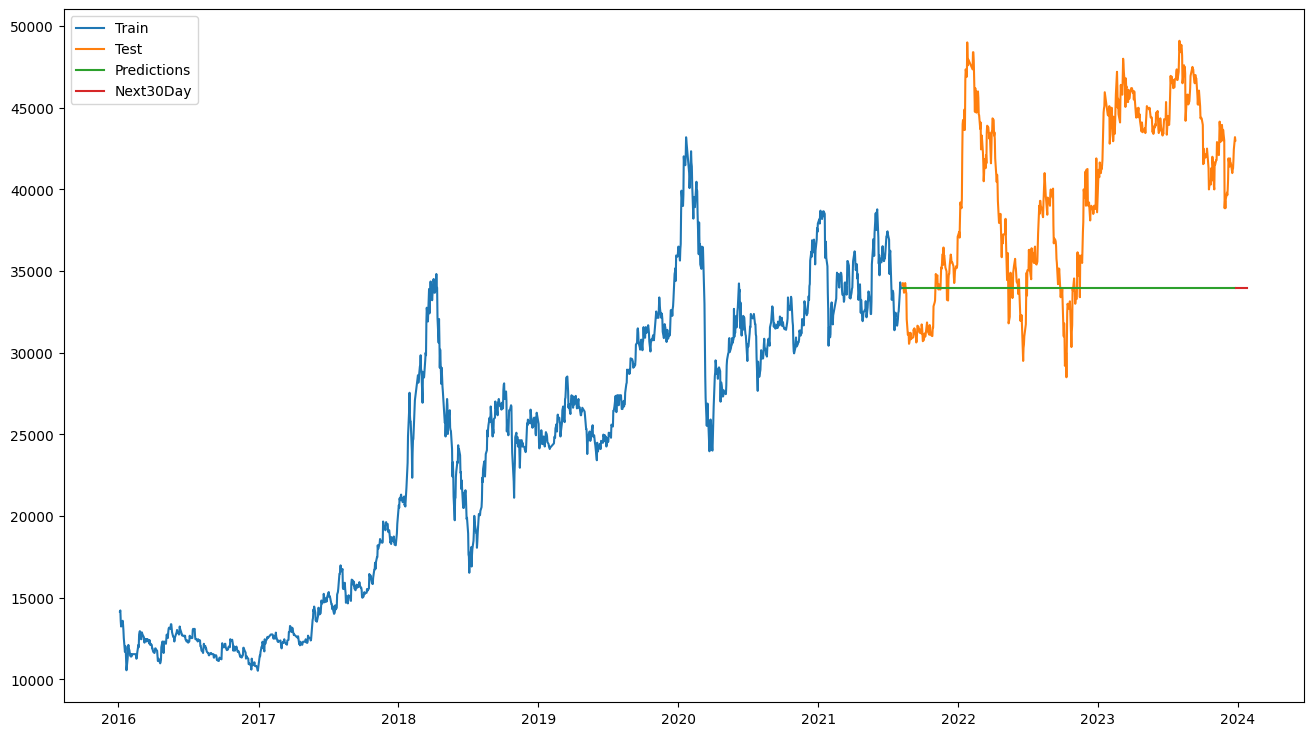

In [20]:
plt.figure(figsize=(16, 9))
plt.plot(train_data73.index, train_data73['Price'])
plt.plot(test_data73.index, test_data73['Price'])
plt.plot(test_data73.index, y_pred73)

# Assuming 'predictions_df' contains the predicted prices for the next 30 days with corresponding dates
plt.plot(predictions_df73.index, predictions_df73['Predicted_Close'])

plt.legend(['Train', 'Test', 'Predictions', 'Next30Day'])
plt.show()


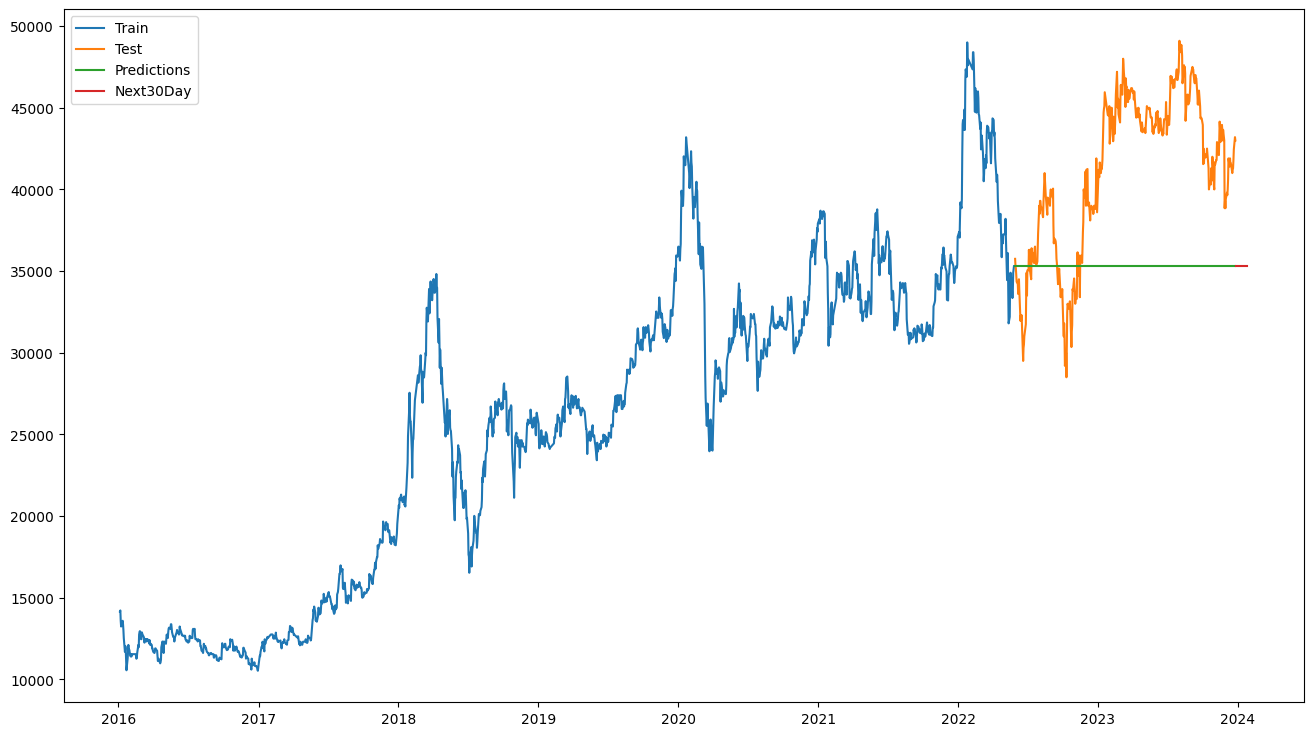

In [21]:
plt.figure(figsize=(16, 9))
plt.plot(train_data82.index, train_data82['Price'])
plt.plot(test_data82.index, test_data82['Price'])
plt.plot(test_data82.index, y_pred82)

# Assuming 'predictions_df' contains the predicted prices for the next 30 days with corresponding dates
plt.plot(predictions_df82.index, predictions_df82['Predicted_Close'])

plt.legend(['Train', 'Test', 'Predictions', 'Next30Day'])
plt.show()


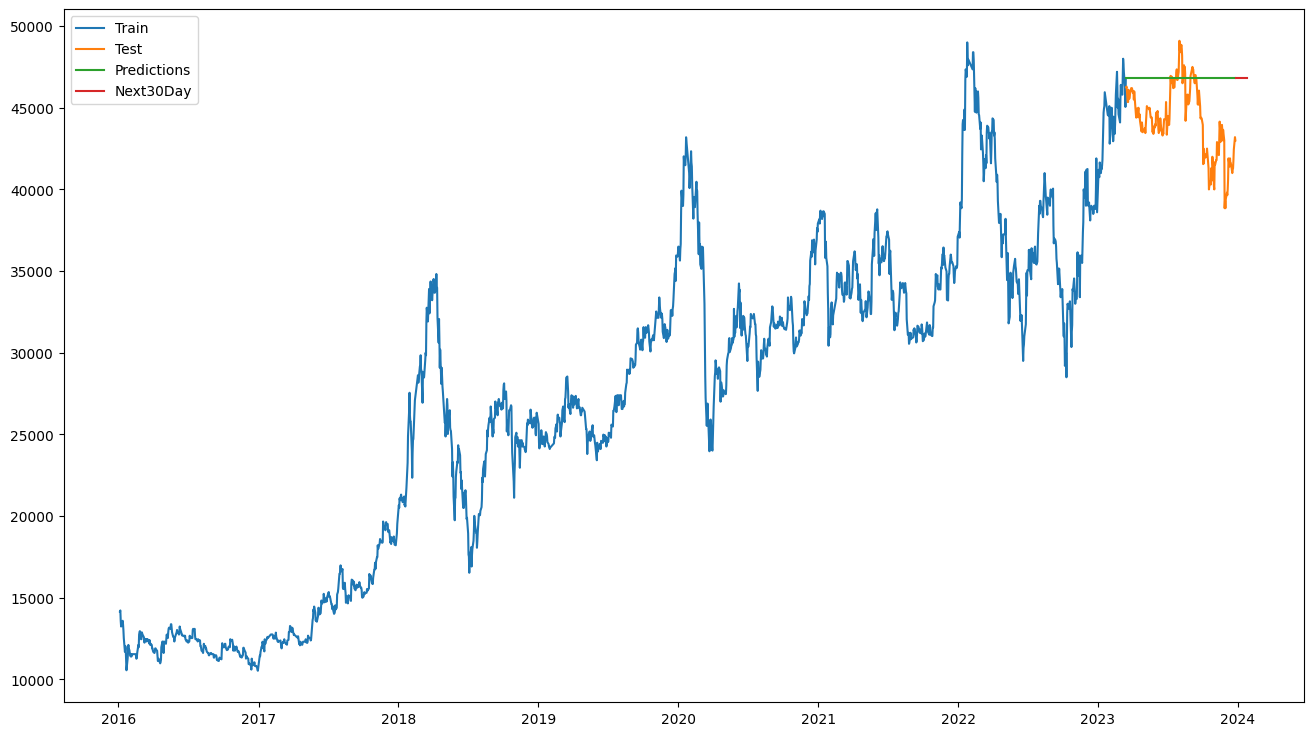

In [22]:
plt.figure(figsize=(16, 9))
plt.plot(train_data91.index, train_data91['Price'])
plt.plot(test_data91.index, test_data91['Price'])
plt.plot(test_data91.index, y_pred91)

# Assuming 'predictions_df' contains the predicted prices for the next 30 days with corresponding dates
plt.plot(predictions_df91.index, predictions_df91['Predicted_Close'])

plt.legend(['Train', 'Test', 'Predictions', 'Next30Day'])
plt.show()
